In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [2]:
x, y, z = 4/np.sqrt(3),4/np.sqrt(3),4/np.sqrt(3)
r = 4
a = 2

In [3]:
# calculate point's coordinates from charge using random walk
# return point's coordinates
def bsurf(x, y, z, r) :
    temp = a/r
    p2 = np.random.rand(1)
    costh = -(1.0-temp)**2 + 2*(1.0-temp)*(1+(temp)**2.0)*p2 + 2.0*temp*(1+(temp)**2)*(p2)**2
    costh = costh/((1.0-temp+2.0*temp*p2)**2)
    sinth = np.sqrt(np.abs(1.0-(costh**2)))
    
    yyy = np.random.rand(1)
    phi = 2*np.pi*yyy
    cosph = np.cos(phi)
    sinph = np.sin(phi)
    
    xold = x
    yold = y
    zold = z
    p = np.sqrt(xold**2 + yold**2)
    x = a*(sinth*cosph*xold*zold/(p*r) - sinth*sinph*yold/p + costh*xold/r)
    y = a*(sinth*cosph*yold*zold/(p*r) + sinth*sinph*xold/p + costh*yold/r)
    z = a*(-sinth*cosph*p/r + costh*zold/r)
    
    return (x, y, z)

In [4]:
# divide the hemisphere to 100 pins
# delta(theta) = pi/100
pts = 1000000
thetas = []

# direct sampling
# sampling pts points
# a sphere with radius 1, center at origin
t = datetime.datetime.now()
for step in range(pts):
    # create a vector v_x, v_y, v_z --> theta = (Ox, v) from -pi/2 to pi/2
    (v_x, v_y, v_z) = bsurf(x, y, z, r)
    sintheta = (np.sqrt((v_x-(x/2))**2+(v_y-(y/2))**2+(v_z-(z/2))**2))/(2*a)
    theta = np.arcsin(sintheta[0])
    thetas.append(theta*2)
    
timedelta = datetime.datetime.now() - t
print(timedelta)

0:00:59.510203


In [5]:
# analytic
the = np.linspace(0,np.pi);
q = 600*np.sin(the)/(8*np.pi*(20-16*np.cos(the))**(3/2));

In [6]:
Rc = 4;
a = Rc/2;
p = 1;
z1 = a - p;
d = (Rc**2)/(2*a-z1) - 2*a;
d

1.333333333333333

In [7]:
# sampling via conformal map and then do rotation to check
t1 = datetime.datetime.now()
pts1 = 1000000
thetas2 = []
for step in range(pts1):
    x = np.random.rand(1)
    rho_d = np.sqrt((1-x**2)/(x**2))
    rho = rho_d * d
    (xA, yA, zA) = (rho,0,-4)
    r = np.sqrt(rho**2 + (-4)**2)
    sinthe = rho/r
    v1 = Rc**2/r
    xA1 = v1*sinthe
    zA1 = v1*Rc/r

    theta = np.random.uniform(np.pi*2)
    i = np.cos(theta)
    j = np.sin(theta)
    vX = xA1*i
    vY = xA1*j
    vZ = zA1*i + 0 + zA1*(1-i)
    
    costheta2 = np.sqrt(vX**2 + vY**2 + vZ**2)/Rc
    thetas2.append(2*np.arccos(costheta2))

timedelta1 = datetime.datetime.now() - t1
print(timedelta1)

0:00:29.767659


In [13]:
# analytic
the2 = np.linspace(0,np.pi);
q2 = (3 - 3/np.sqrt(5-4*np.cos(the)))/2;

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


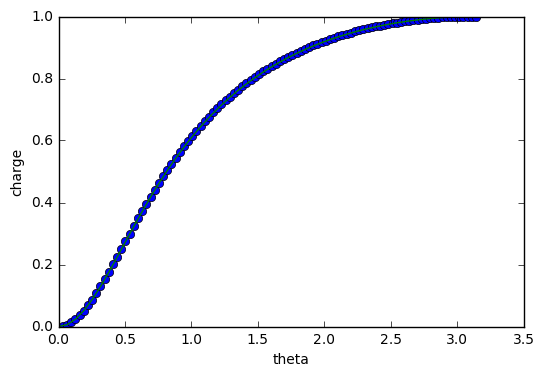

In [15]:
y, binEd = np.histogram(thetas, bins = 100, normed = True);
F1 = np.cumsum(y)
scale = 1/F1[-1]
nF1 = F1 * scale
bincenters = binEd[1:]
             
y2, binEd2 = np.histogram(thetas2, bins = 100, density = 1);
bincenters2 = binEd2[1:]
for i in range(100):
    rh = 4*np.tan(bincenters2[i]/2)
    bin = y2[i]*(4*a)/(Rc*np.sqrt(4*a**2+rh**2))
    y2[i] = bin
F1 = np.cumsum(y2)
scale = 1/F1[-1]
nF1 = F1 * scale

fig,ax = plt.subplots(1,1)             
plot1=ax.plot(bincenters2, nF1, 'o',label='numerical');
plot2=ax.plot(the2,q2,label='analytic');
ax.set_xlabel("theta")
ax.set_ylabel("charge")

In [16]:
# export data

table = [bincenters2, nF1]
my_df = pd.DataFrame(table).transpose()
my_df.to_csv('table.csv', index = None, header = None)

table1 = [the2, q2]
my_df1 = pd.DataFrame(table1).transpose()
my_df1.to_csv('table1.csv', index = None, header = None)